<a href="https://colab.research.google.com/github/vbhaktha13/Neural-Networks/blob/main/fashionmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!unzip '/content/archive (4).zip'

Archive:  /content/archive (4).zip
replace fashion-mnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace fashion-mnist_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace t10k-images-idx3-ubyte? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace t10k-labels-idx1-ubyte? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace train-images-idx3-ubyte? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace train-labels-idx1-ubyte? [y]es, [n]o, [A]ll, [N]one, [r]ename: no


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from keras.models import sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.utils import to_categorical
from keras.losses import categorical_crossentropy



In [7]:
train=pd.read_csv('/content/fashion-mnist_train.csv')

In [8]:
test=pd.read_csv('/content/fashion-mnist_test.csv')

In [9]:
print(train.shape)
print(test.shape)

(60000, 785)
(10000, 785)


In [10]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


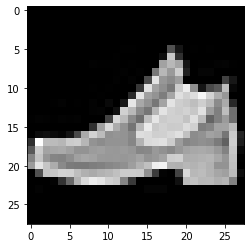

In [15]:
from keras.backend_config import image_data_format
features= ["pixel{}".format(pixel_num) for pixel_num in range (1 , 785)]
rows_to_examine=1
image_data =np.reshape(train[features][rows_to_examine:rows_to_examine+1].to_numpy(),(28,28))
plt.imshow(image_data,cmap='gray')

In [13]:
image_data.shape

(28, 28)

In [21]:
#separating X,y
X = train.iloc[:,1:]
y = train['label']

In [22]:
print(X.shape)
print(y.shape)

(60000, 784)
(60000,)


In [23]:
#split train, test
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2,random_state=123)

In [24]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(48000, 784)
(48000,)
(12000, 784)
(12000,)


In [26]:
mlp=MLPClassifier(hidden_layer_sizes=(16,16,16),verbose=True)


In [27]:
mlp.fit(X_train,y_train)

Iteration 1, loss = 3.43231361
Iteration 2, loss = 2.03528593
Iteration 3, loss = 1.56003202
Iteration 4, loss = 1.33809714
Iteration 5, loss = 1.25801888
Iteration 6, loss = 1.21226039
Iteration 7, loss = 1.16612555
Iteration 8, loss = 0.99604522
Iteration 9, loss = 0.91211874
Iteration 10, loss = 0.87166199
Iteration 11, loss = 0.84690449
Iteration 12, loss = 0.83917297
Iteration 13, loss = 0.82846150
Iteration 14, loss = 0.82152688
Iteration 15, loss = 0.81623905
Iteration 16, loss = 0.80634654
Iteration 17, loss = 0.80440505
Iteration 18, loss = 0.80520559
Iteration 19, loss = 0.79752691
Iteration 20, loss = 0.79851833
Iteration 21, loss = 0.79623638
Iteration 22, loss = 0.78686976
Iteration 23, loss = 0.79216746
Iteration 24, loss = 0.78669535
Iteration 25, loss = 0.78439978
Iteration 26, loss = 0.78438314
Iteration 27, loss = 0.78287740
Iteration 28, loss = 0.77902647
Iteration 29, loss = 0.77566693
Iteration 30, loss = 0.77602932
Iteration 31, loss = 0.77780836
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(16, 16, 16), verbose=True)

In [28]:
y_hat=mlp.predict(X_test)

In [30]:
def model_eval(actual,predicted):
  cm_mlp=(confusion_matrix(actual, predicted))
  acc_score=(accuracy_score(actual, predicted))
  classrep_mlp=(classification_report(actual,predicted))
  print('the accuracy of the model is:',acc_score)
  print(cm_mlp)
  print(classrep_mlp)

In [31]:
model_eval(y_test,y_hat)

the accuracy of the model is: 0.7696666666666667
[[ 912    2   88  107   18    2    7    0    4    0]
 [  14 1149   13   55    2    3    2    0    3    0]
 [  16    1  935   12  234    1    3    0   10    0]
 [  45   31   35  957   64    8    7    1    1    0]
 [   4    0  275   48  772    0    1    0   50    0]
 [   1    0    0    1    1 1146    0   50    2   23]
 [ 282    0  606   58  228    0    7    0   27    0]
 [   0    0    1    0    0   48    0 1139    0   39]
 [   4    0   19   11  104   13    0   10 1063    0]
 [   0    1    0    1    0   17    0   50    0 1156]]
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      1140
           1       0.97      0.93      0.95      1241
           2       0.47      0.77      0.59      1212
           3       0.77      0.83      0.80      1149
           4       0.54      0.67      0.60      1150
           5       0.93      0.94      0.93      1224
           6       0.26      0.01      0.